In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11501568/11490434 [==============================] - 0s 0us/step


In [23]:
len(x_train)

60000

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


2

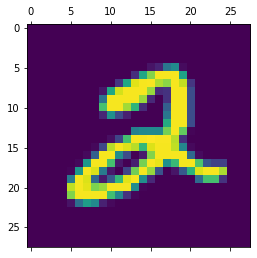

In [26]:
plt.matshow(x_train[5])
y_train[5]

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [6]:
# Normalization

x_train[0].max()

255

In [7]:
x_train[0].min()

0

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
#NORMALISATION
x_train = x_train/255
x_test= x_test/255

In [10]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
# Creating a Neural Network

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape))
model.add(tf.keras.layers.Dense(1568,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1568)              1230880   
                                                                 
 dense_1 (Dense)             (None, 10)                15690     
                                                                 
Total params: 1,246,570
Trainable params: 1,246,570
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
60000/32

1875.0

In [16]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1797 - accuracy: 0.9445
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0736 - accuracy: 0.9770
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0466 - accuracy: 0.9854
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0349 - accuracy: 0.9884
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0282 - accuracy: 0.9904
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0217 - accuracy: 0.9930
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0201 - accuracy: 0.9934
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0151 - accuracy: 0.9950
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0134 - accuracy: 0.9956
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

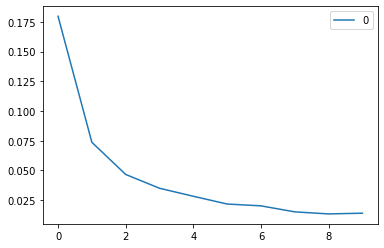

In [17]:
import pandas as pd
loss = pd.DataFrame(model.history.history['loss']).plot()

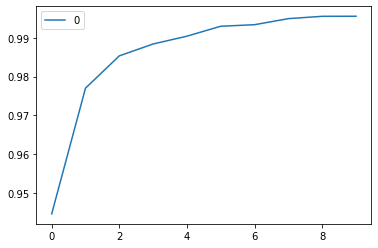

In [18]:
acc = pd.DataFrame(model.history.history['accuracy']).plot()

In [19]:
#evaluate on test data
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [20]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9815

In [22]:
model.save('digit.hdf5')

# for saving NN Architecture and trainable parameters